# import libraries 

In [1]:
#for visualization

import matplotlib.pyplot as plt
import imageio
import matplotlib.image as img
from tensorflow.keras.preprocessing import image
import numpy as np
#read image path

import pathlib
from pathlib import Path


#for image processing

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
#for model

import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import *

#for warnings
import warnings
warnings.filterwarnings("ignore")

# Read file

In [2]:
data_path=pathlib.Path('/kaggle/input/brain-tumor-mri-data/brain-tumor-mri-dataset')

# List Files

In [3]:
images_class = os.listdir('/kaggle/input/brain-tumor-mri-data/brain-tumor-mri-dataset')
images_class

['pituitary', 'notumor', 'meningioma', 'glioma']

# Get First Photo From Each File

In [4]:
def plot_images(images_class):
    plt.figure(figsize = (14,14))
    
    for i , category in enumerate(images_class):
        image_path = data_path  / category
        image_in_folder = os.listdir(image_path)
        
        first_image = image_in_folder[0]
        first_image_path = image_path/ first_image
        
        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255
        
        plt.subplot(4,4, i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

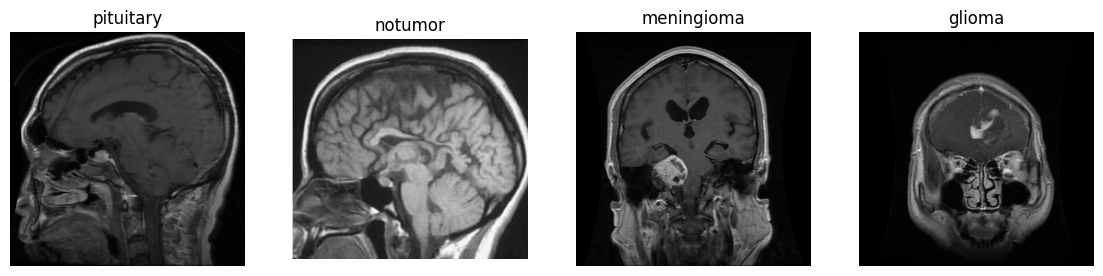

In [5]:
plot_images(images_class)

In [6]:
data_generator=ImageDataGenerator(rescale=1/255,
                                 validation_split=0.3)

# splitting Data

In [7]:
train_data=data_generator.flow_from_directory('/kaggle/input/brain-tumor-mri-data/brain-tumor-mri-dataset',
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical',
                                             shuffle=True,
                                             subset='training')

Found 5008 images belonging to 4 classes.


In [8]:
test_data=data_generator.flow_from_directory('/kaggle/input/brain-tumor-mri-data/brain-tumor-mri-dataset',
                                             target_size=(224,224),
                                             batch_size=1,
                                             class_mode='categorical',
                                             shuffle=True,
                                             subset='validation')

Found 2145 images belonging to 4 classes.


# CNN model

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, padding='same', 
                 activation='relu', input_shape=[224, 224, 3]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25)) 

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5)) 

model.add(Dense(4, activation='softmax'))


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      25,690,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,710,148 (98.08 MB)

 Trainable params: 25,710,148 (98.08 MB)

 Non-trainable params: 0 (0.00 B)

# Compile Data

In [11]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Fit Data

In [12]:
model_history=model.fit(train_data,epochs=5,validation_data=test_data)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 51s 271ms/step - accuracy: 0.4843 - loss: 2.2890 - val_accuracy: 0.7967 - val_loss: 0.5280
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 113ms/step - accuracy: 0.8005 - loss: 0.5035 - val_accuracy: 0.8424 - val_loss: 0.4168
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 109ms/step - accuracy: 0.8747 - loss: 0.3202 - val_accuracy: 0.8834 - val_loss: 0.3084
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 139ms/step - accuracy: 0.8916 - loss: 0.2675 - val_accuracy: 0.8993 - val_loss: 0.3032
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 120ms/step - accuracy: 0.9227 - loss: 0.1919 - val_accuracy: 0.9072 - val_loss: 0.2824


# Visualizing History

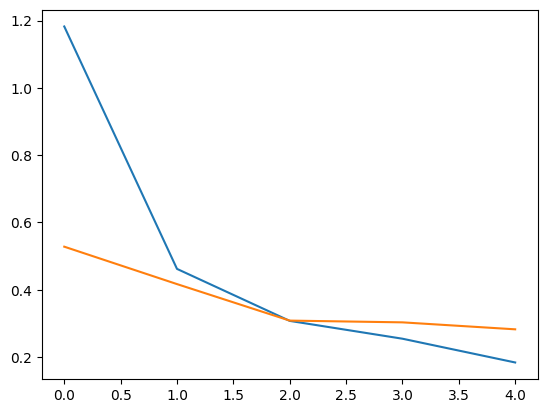

In [13]:
plt.plot(model_history.history['loss'],label='train_loss')
plt.plot(model_history.history['val_loss'],label='validation_loss')


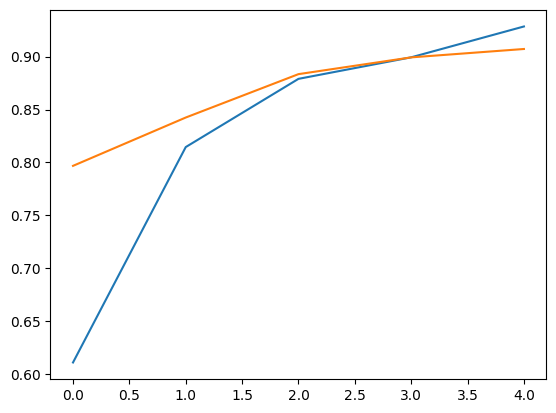

In [14]:
plt.plot(model_history.history['accuracy'],label='train_accuracy')
plt.plot(model_history.history['val_accuracy'],label='validation_accuracy')

# Accuracy on train data

In [15]:
train_loss, train_accuracy = model.evaluate(train_data)

print(f"Accuracy on train data: {train_accuracy:.2%} | Loss: {train_loss:.4f}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step - accuracy: 0.9783 - loss: 0.0910
Accuracy on train data: 97.68% | Loss: 0.0929


# Accuracy on test data

In [16]:
test_loss, test_accuracy = model.evaluate(test_data)

print(f"Accuracy on train data: {test_accuracy:.2%} | Loss: {test_loss:.4f}")


2145/2145 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9089 - loss: 0.2740
Accuracy on train data: 90.72% | Loss: 0.2824


In [17]:
model.save('Brain Tumar Classification | Accuracy 90%.h5') 

## Predictions

In [18]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

class_names = ['glioma', 'meningioma','notumor','pituitary']
model = load_model('Brain Tumar Classification | Accuracy 90%.h5')

def prediction(test_image, actual_label, model):
    
    testing_img = image.load_img(test_image, target_size=(224, 224))  # Resize to 224x224
    test_img_array = image.img_to_array(testing_img) / 255.0  # Normalize to range [0, 1]

    test_img_input = test_img_array.reshape(1, *test_img_array.shape)

    predictions = model.predict(test_img_input)  # Get prediction probabilities
    predicted_class = np.argmax(predictions, axis=1)[0]  # Get predicted class index
    predicted_label = class_names[predicted_class]  # Map index to class name

    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_array)
    plt.title(f'Actual Label: {actual_label}, Predicted Label: {predicted_label}')
    plt.grid(False)
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


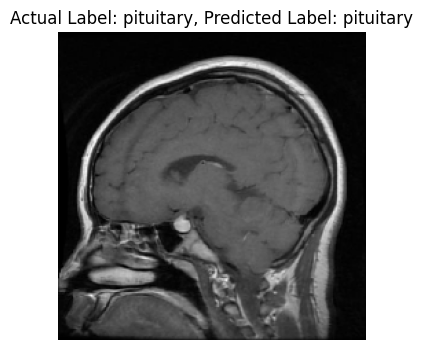

In [19]:
test_image=r'/kaggle/input/brain-tumor-mri-data/brain-tumor-mri-dataset/pituitary/pi-0027.jpg'
prediction (test_image, actual_label='pituitary',model=model)